In [149]:
import pandas as pd
###########################
import re
###########################
from numpy import array
import numpy as np
###########################
import matplotlib.pyplot as plt
###########################
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
###########################
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [150]:
df = pd.read_csv('data.csv')

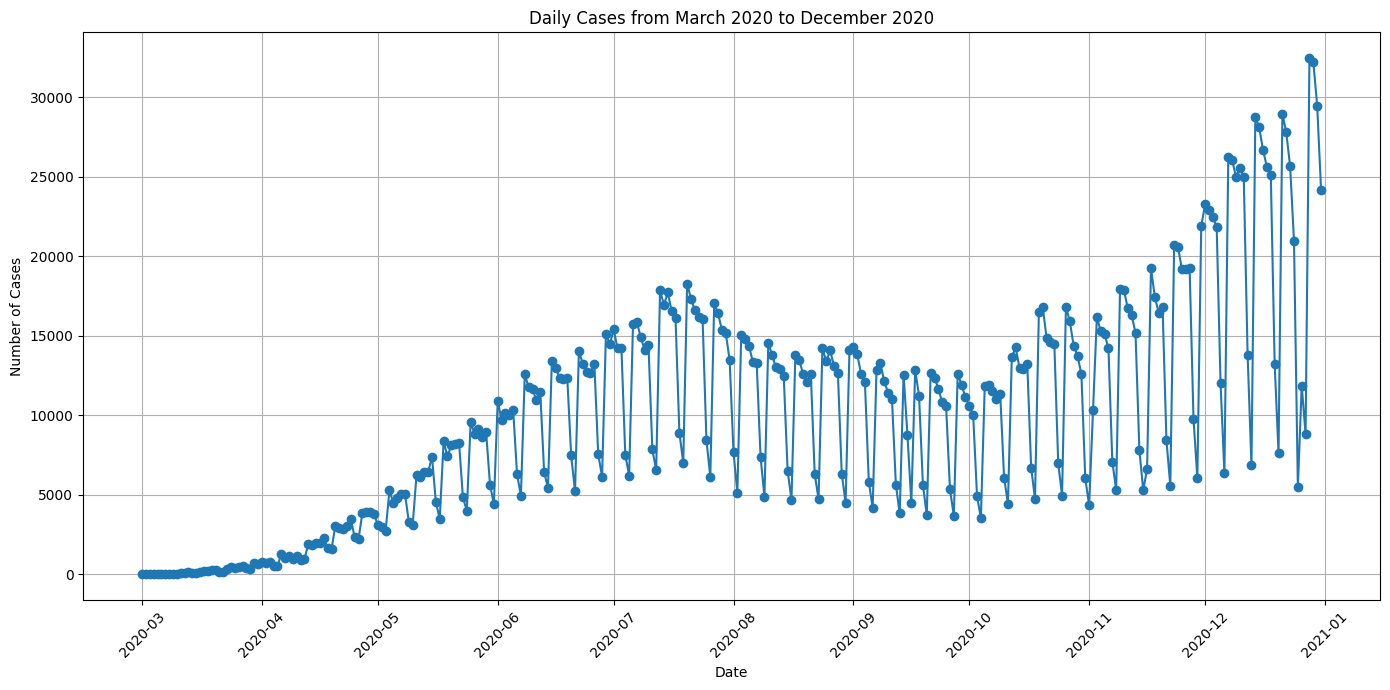

In [151]:
df_transposed = df.set_index(['cve_ent', 'poblacion', 'nombre']).T

df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'date'}, inplace=True)
df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

mask = (df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')
df_filtered = df_transposed.loc[mask]

df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
df_daily = df_filtered_numeric.sum(axis=1)

plt.figure(figsize=(14, 7))
plt.plot(df_filtered['date'], df_daily, marker='o', linestyle='-')
plt.title('Daily Cases from March 2020 to December 2020')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [152]:
estados_a_filtrar = ["Nacional", "DISTRITO FEDERAL", "GUANAJUATO", "JALISCO", "MORELOS", "PUEBLA", "QUERETARO"]
df_filtrado = df[df['nombre'].isin(estados_a_filtrar)]
df_filtrado.fillna(method='ffill', inplace=True)

/var/folders/73/m50h3qv91_n45vnh3sfw1pb00000gq/T/ipykernel_17158/340870129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.fillna(method='ffill', inplace=True)


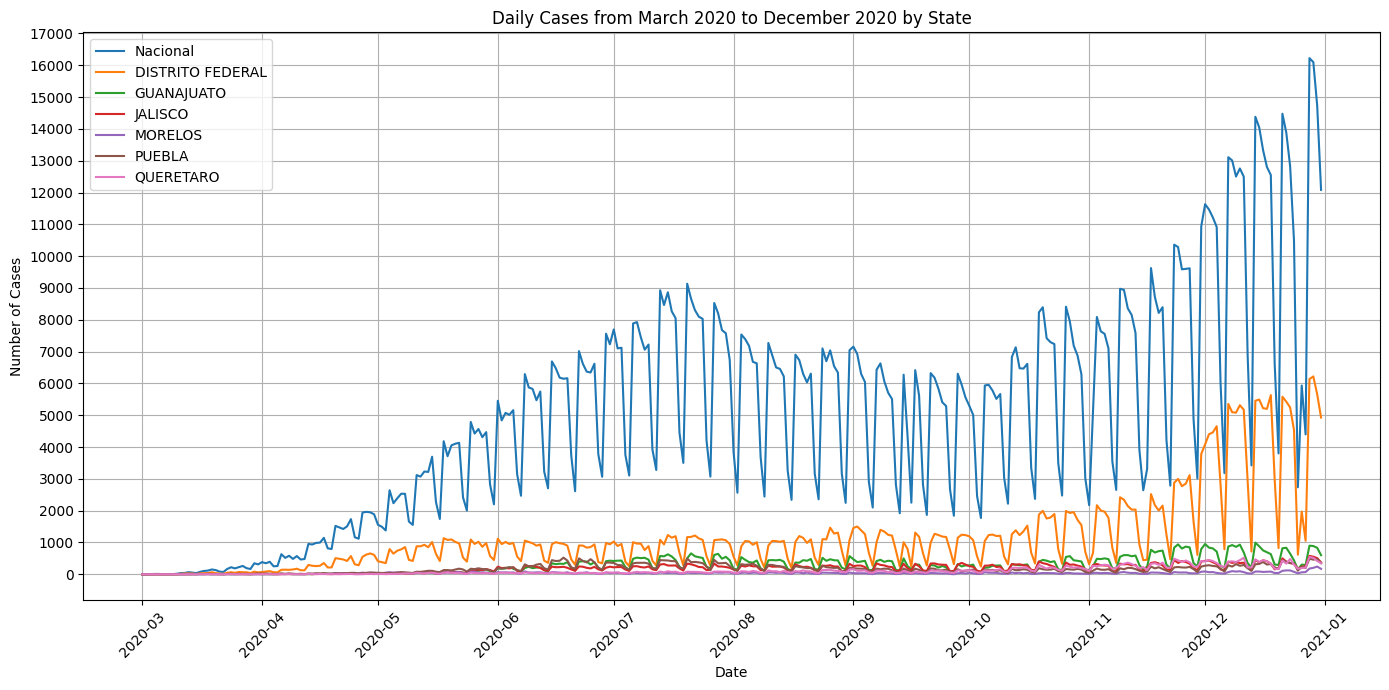

In [153]:
plt.figure(figsize=(14, 7))

max_cases = 0

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    if df_daily.max() > max_cases:
        max_cases = df_daily.max()

    plt.plot(df_filtered['date'], df_daily, linestyle='-', label=estado)

plt.yticks(range(0, int(max_cases) + 1000, 1000))

plt.title('Daily Cases from March 2020 to December 2020 by State')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

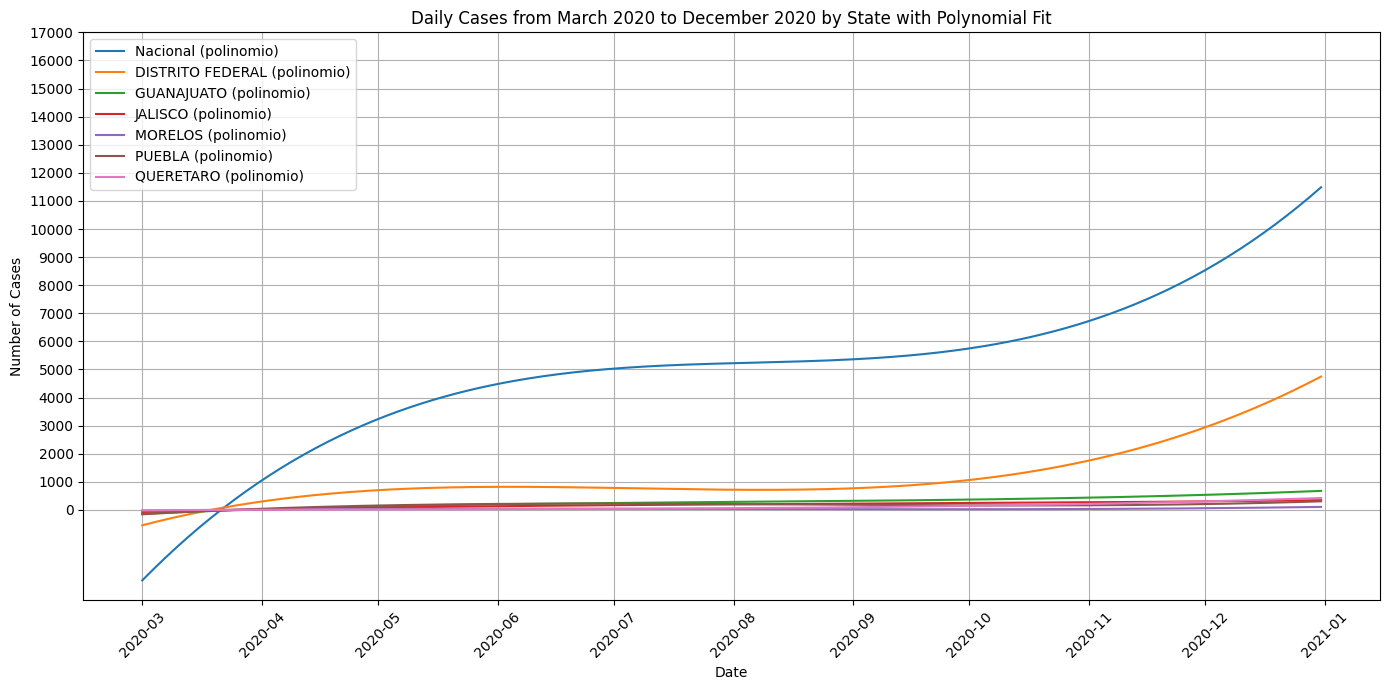

In [154]:
plt.figure(figsize=(14, 7))

max_cases = 0

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    if df_daily.max() > max_cases:
        max_cases = df_daily.max()

    x = np.arange(len(df_daily))
    y = df_daily.values
    p = np.polyfit(x, y, 3)
    poly = np.poly1d(p)

    plt.plot(df_filtered['date'], poly(x), linestyle='-', label=f'{estado} (polinomio)')

plt.yticks(range(0, int(max_cases) + 1000, 1000))

plt.title('Daily Cases from March 2020 to December 2020 by State with Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

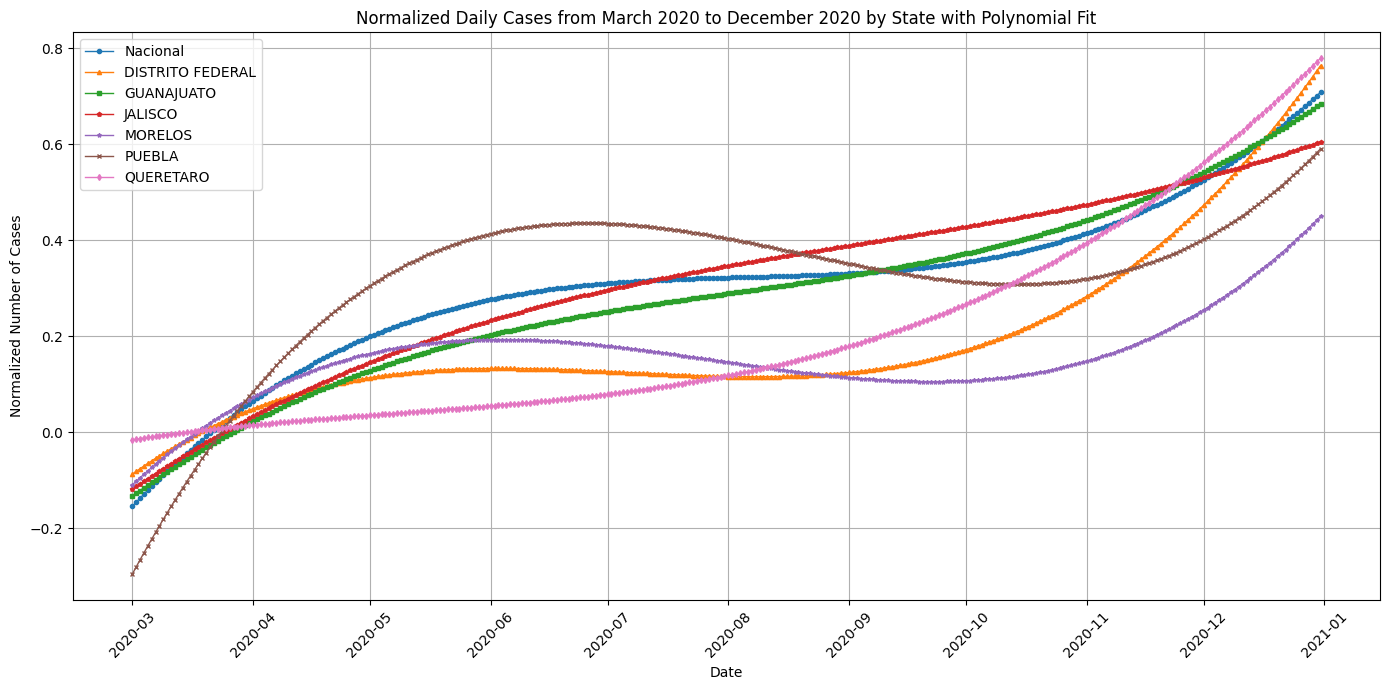

In [8]:
plt.figure(figsize=(14, 7))

markers = ['o', '^', 's', 'p', '*', 'x', 'd']

for estado, marker in zip(estados_a_filtrar, markers):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    scaler = MinMaxScaler()
    df_daily_normalized = scaler.fit_transform(df_daily.values.reshape(-1, 1)).flatten()

    x = np.arange(len(df_daily_normalized))
    p = np.polyfit(x, df_daily_normalized, 3)
    poly = np.poly1d(p)

    plt.plot(df_filtered['date'], poly(x), linestyle='-', marker=marker, markersize=3, linewidth=1, label=f'{estado}')

plt.title('Normalized Daily Cases from March 2020 to December 2020 by State with Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Normalized Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

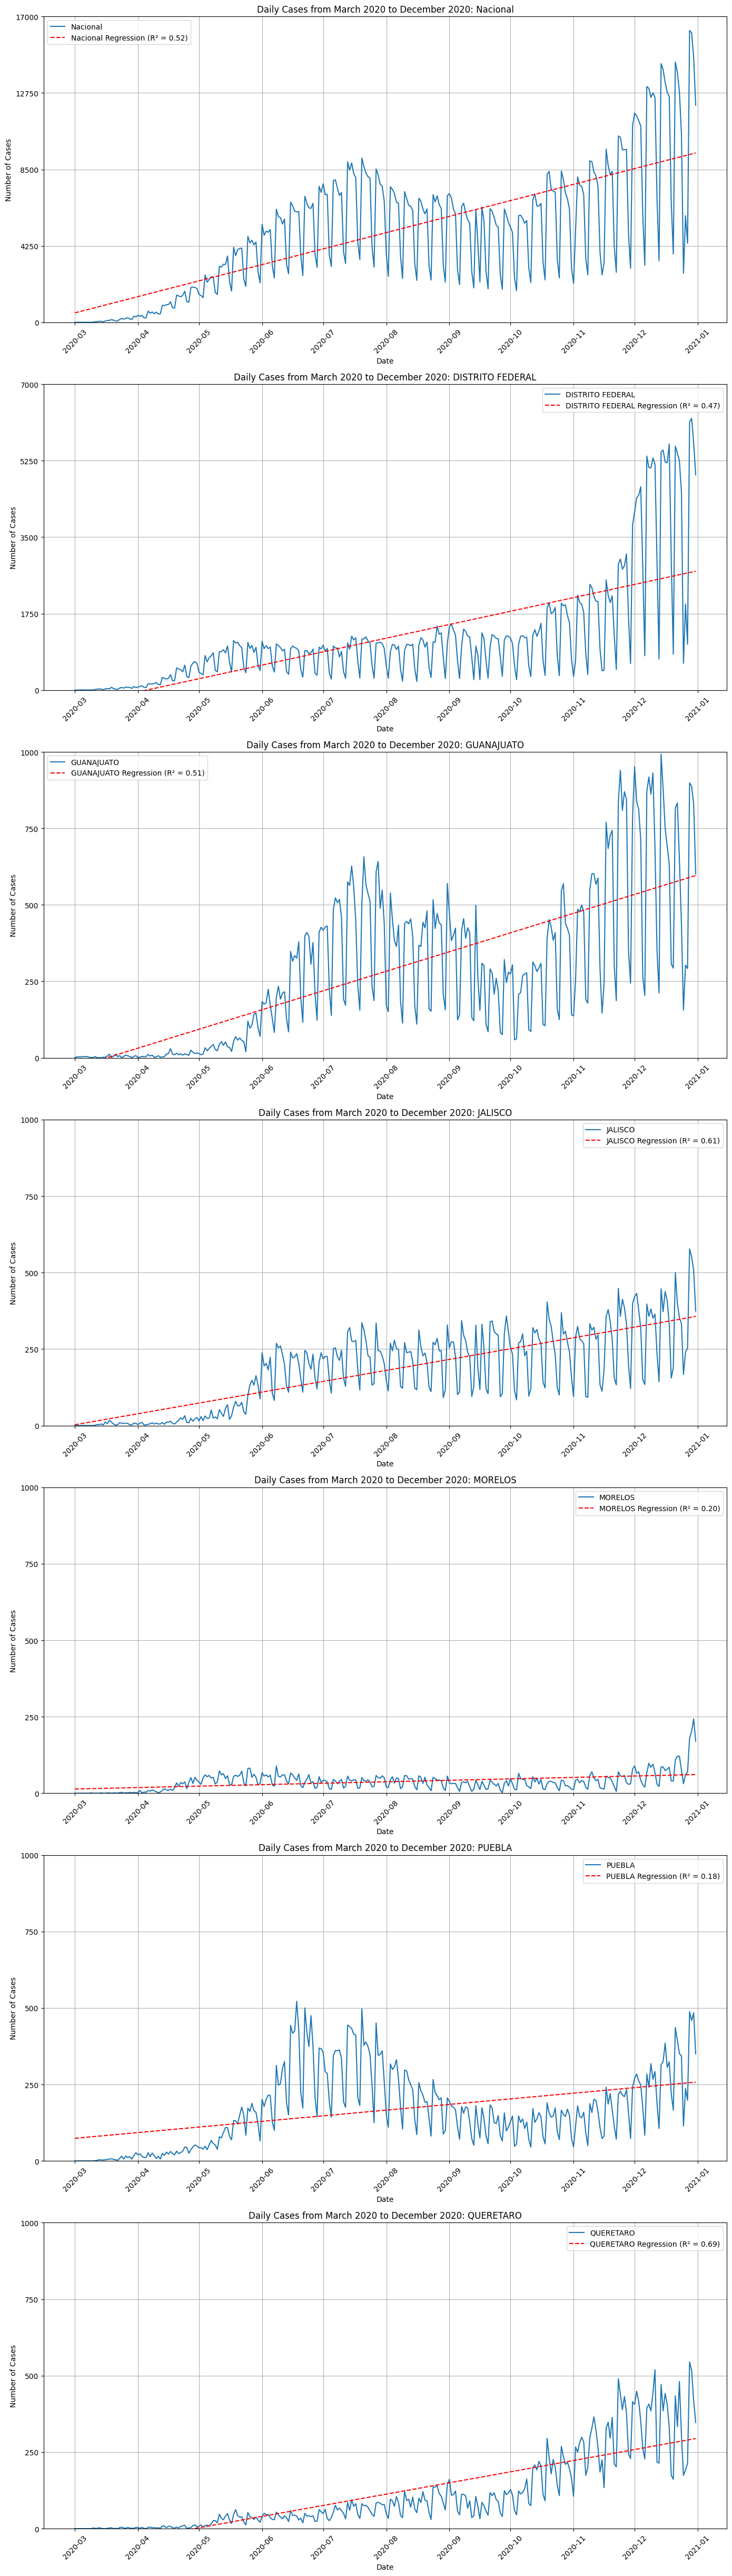

In [173]:
fig, axes = plt.subplots(len(estados_a_filtrar), 1, figsize=(14, 7 * len(estados_a_filtrar)))

if len(estados_a_filtrar) == 1:
    axes = [axes]
for ax, estado in zip(axes, estados_a_filtrar):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]
    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    x = np.array(range(len(df_daily))).reshape(-1, 1)
    y = df_daily.values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    r_squared = r2_score(y, y_pred)

    ax.plot(df_filtered['date'], df_daily, linestyle='-', label=f'{estado}')
    ax.plot(df_filtered['date'], y_pred, linestyle='--', color='red', label=f'{estado} Regression (R² = {r_squared:.2f})')
    ax.set_title(f'Daily Cases from March 2020 to December 2020: {estado}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Cases')
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    max_daily_cases = df_daily.max()
    upper_limit = ((max_daily_cases // 1000) + 1) * 1000
    ax.set_ylim(0, upper_limit)
    ax.set_yticks(np.linspace(0, upper_limit, num=5))

plt.tight_layout()
plt.show()

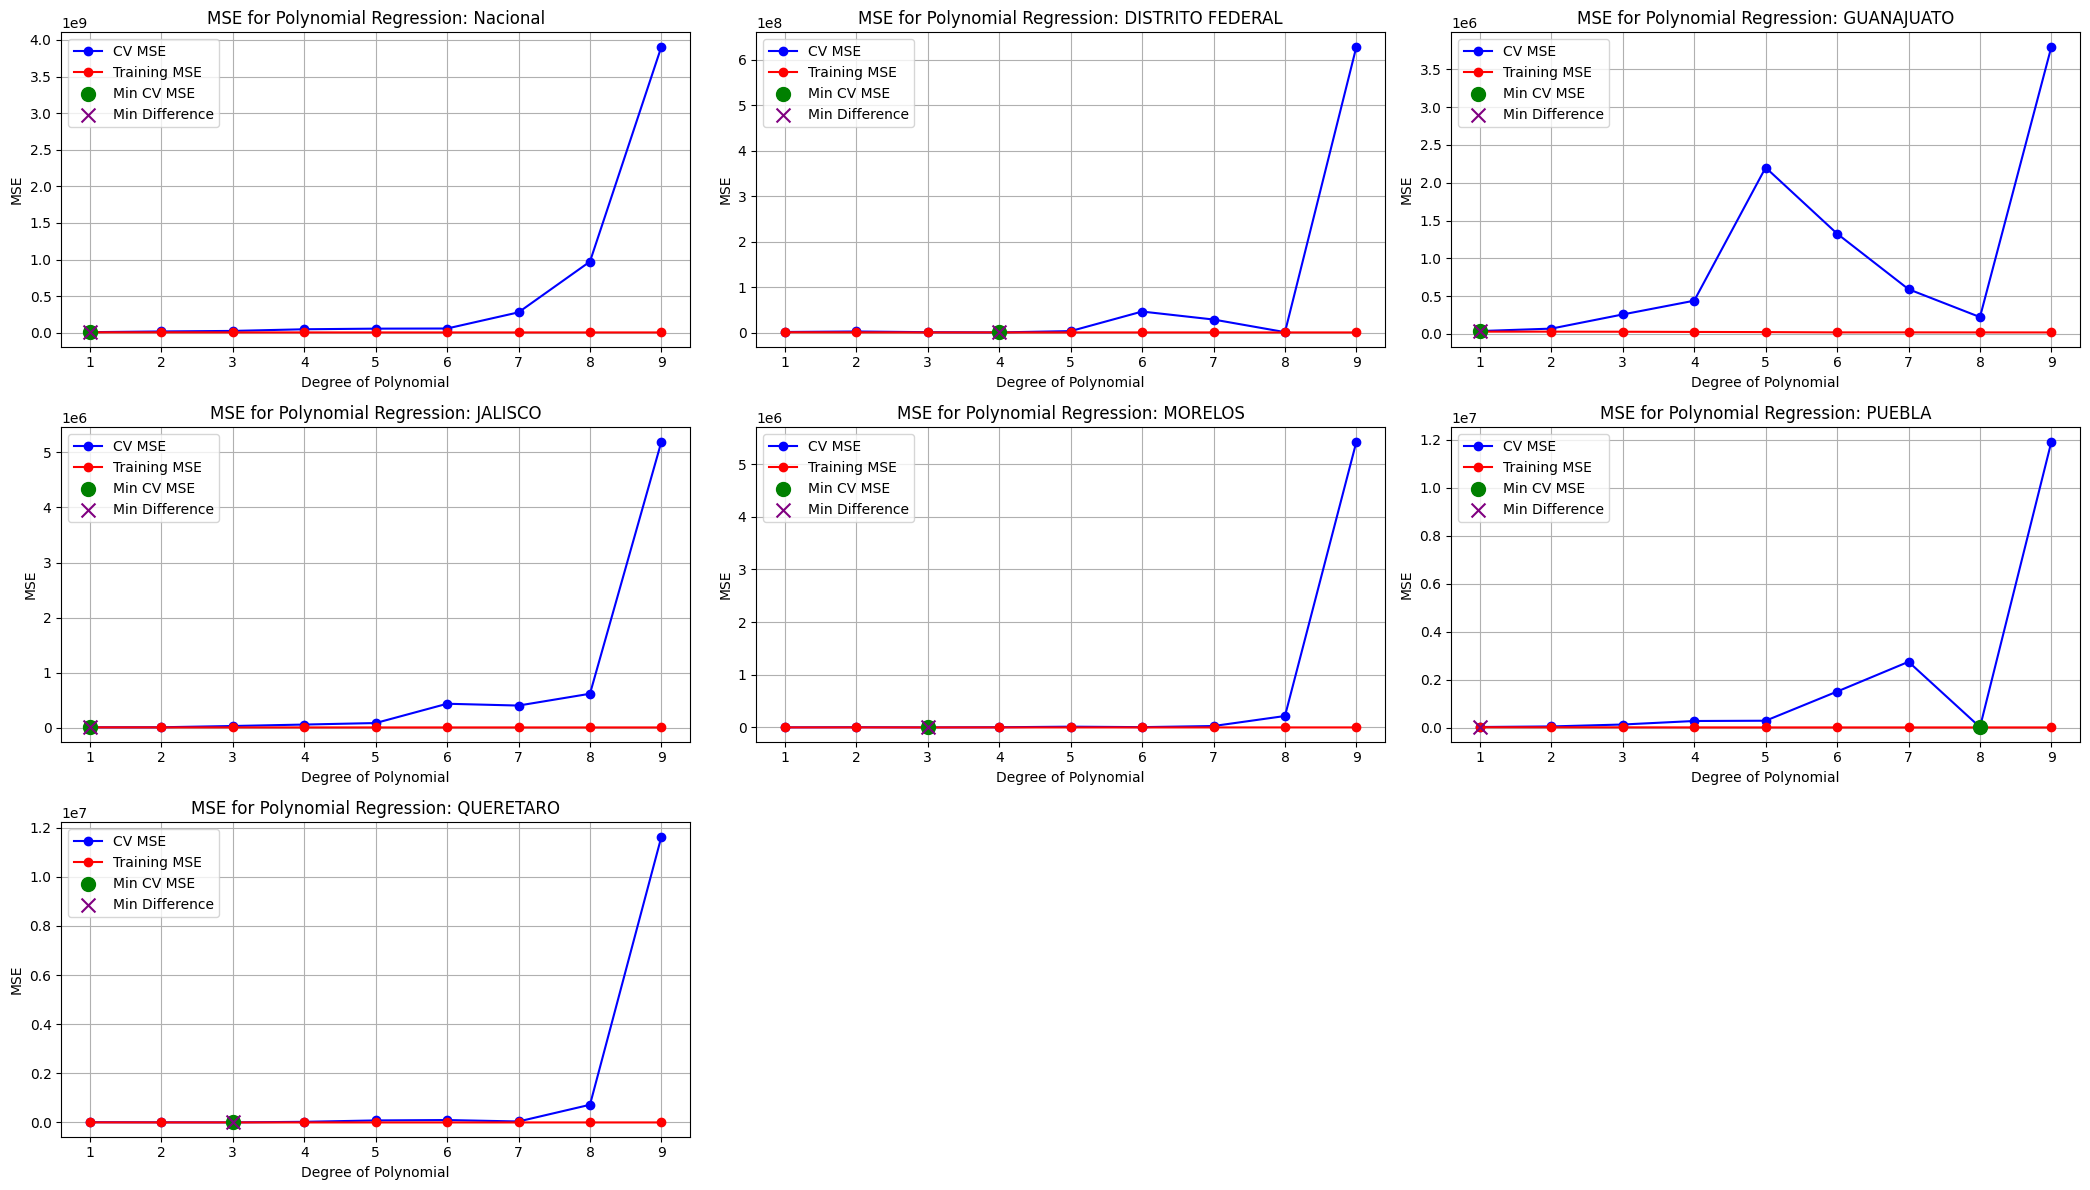

Nacional: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
DISTRITO FEDERAL: Optimal by difference = Degree 4, Optimal by CV MSE = Degree 4
GUANAJUATO: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
JALISCO: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
MORELOS: Optimal by difference = Degree 3, Optimal by CV MSE = Degree 3
PUEBLA: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 8
QUERETARO: Optimal by difference = Degree 3, Optimal by CV MSE = Degree 3


In [174]:
n_rows = (len(estados_a_filtrar) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(21, 4 * n_rows))
axes = axes.flatten()

degrees = range(1, 10)

optimal_degrees_difference = []
optimal_degrees_cv_min = []

for ax, estado in zip(axes, estados_a_filtrar):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]
    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    x = np.array(range(len(df_daily))).reshape(-1, 1)
    y = df_daily.values.reshape(-1, 1)

    cv_scores = []
    mse_scores = []

    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
        cv_scores.append(-scores.mean())
        model.fit(x, y)
        y_pred = model.predict(x)
        mse_scores.append(mean_squared_error(y, y_pred))

    mse_differences = np.abs(np.array(mse_scores) - np.array(cv_scores))
    min_difference_index = np.argmin(mse_differences)
    min_cv_mse_index = np.argmin(cv_scores)
    
    optimal_degrees_difference.append(degrees[min_difference_index])
    optimal_degrees_cv_min.append(degrees[min_cv_mse_index])

    ax.plot(degrees, cv_scores, label='CV MSE', marker='o', color='blue')
    ax.plot(degrees, mse_scores, label='Training MSE', marker='o', color='red')
    ax.scatter([degrees[min_cv_mse_index]], [cv_scores[min_cv_mse_index]], color='green', s=100, label='Min CV MSE', zorder=5, marker='o')
    ax.set_title(f'MSE for Polynomial Regression: {estado}')
    ax.scatter([degrees[min_difference_index]], [cv_scores[min_difference_index]], color='purple', s=100, label='Min Difference', zorder=5, marker='x')
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('MSE')
    ax.legend()
    ax.grid(True)

for i in range(len(estados_a_filtrar), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

for estado, min_diff_deg, min_cv_deg in zip(estados_a_filtrar, optimal_degrees_difference, optimal_degrees_cv_min):
    print(f"{estado}: Optimal by difference = Degree {min_diff_deg}, Optimal by CV MSE = Degree {min_cv_deg}")


In [175]:
optimal_degrees_summary = []

for estado, min_diff_deg, min_cv_deg in zip(estados_a_filtrar, optimal_degrees_difference, optimal_degrees_cv_min):
    if min_diff_deg == min_cv_deg:
        result = print(f"{estado}: El grado de polinomio óptimo es {min_diff_deg}")
        optimal_degrees_summary.append(min_diff_deg)
    else:
        result = print(f"{estado}: Hay dos posibilidades para el grado de polinomio óptimo, {min_diff_deg} y {min_cv_deg}")
        optimal_degrees_summary.append(min_cv_deg)

# Con algunas pruebas y a base de obseraciones, se anotaron los grados de polinomio óptimos para cada estado utilizando como referencia el valor de R2 y la similitud entre la regresión y los datos reales.
# optimal_degrees_summary = [5,4,5,3,3,8,3]

Nacional: El grado de polinomio óptimo es 1
DISTRITO FEDERAL: El grado de polinomio óptimo es 4
GUANAJUATO: El grado de polinomio óptimo es 1
JALISCO: El grado de polinomio óptimo es 1
MORELOS: El grado de polinomio óptimo es 3
PUEBLA: Hay dos posibilidades para el grado de polinomio óptimo, 1 y 8
QUERETARO: El grado de polinomio óptimo es 3


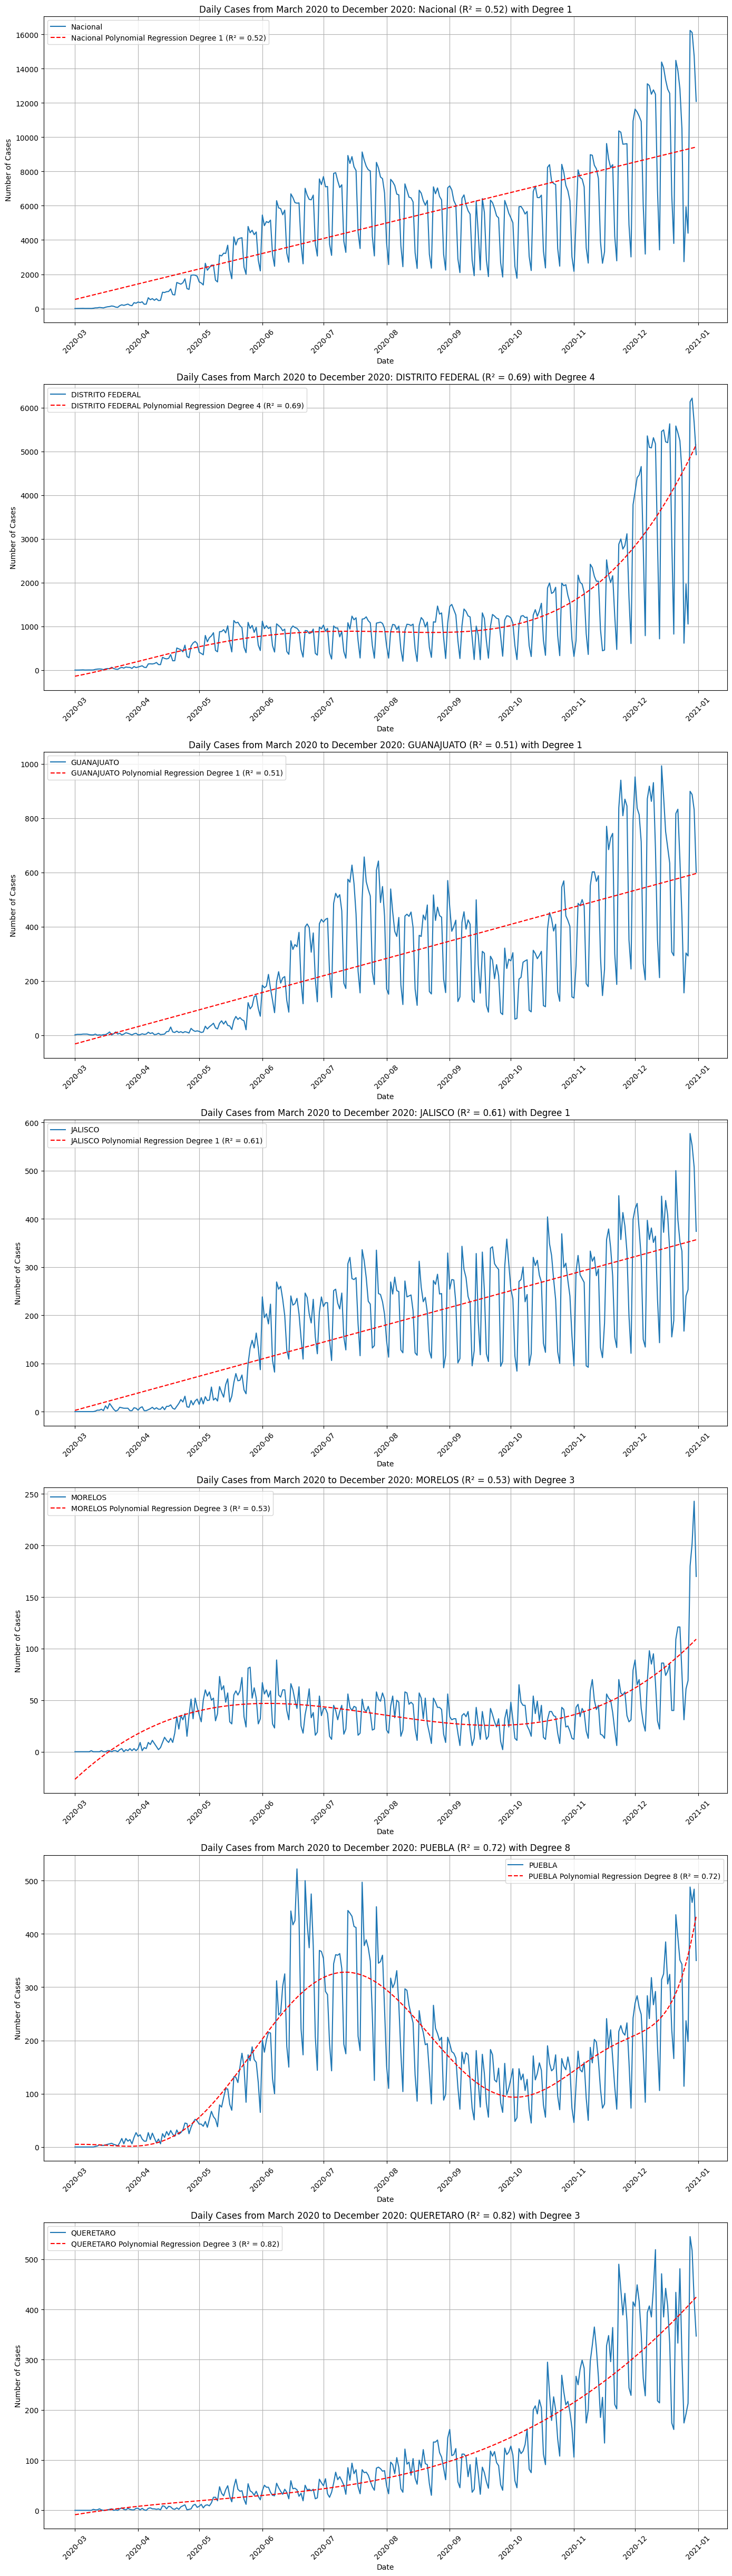

In [176]:
df_linealizado = pd.DataFrame()

fig, axes = plt.subplots(len(estados_a_filtrar), 1, figsize=(14, 7 * len(estados_a_filtrar)))
rs = []

if len(estados_a_filtrar) == 1:
    axes = [axes]

for ax, estado, degree in zip(axes, estados_a_filtrar, optimal_degrees_summary):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]
    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    x = np.array(range(len(df_daily))).reshape(-1, 1)
    y = df_daily.values.reshape(-1, 1)

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    y_pred = model.predict(x)

    r_squared = r2_score(y, y_pred)

    ax.plot(df_filtered['date'], df_daily, linestyle='-', label=f'{estado}')
    ax.plot(df_filtered['date'], y_pred, linestyle='--', color='red', label=f'{estado} Polynomial Regression Degree {degree} (R² = {r_squared:.2f})')
    rs.append(r_squared)
    ax.set_title(f'Daily Cases from March 2020 to December 2020: {estado}' + f' (R² = {r_squared:.2f}) with Degree {degree}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Cases')
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    df_linealizado_temp = pd.DataFrame({
        'date': df_filtered['date'],
        'estado': estado,
        'predicted_cases': y_pred.flatten()
    })
    df_linealizado = pd.concat([df_linealizado, df_linealizado_temp], ignore_index=True)

plt.tight_layout()
plt.show()


In [177]:
df_linealizado = df_linealizado.pivot(index='date', columns='estado', values='predicted_cases')

print(df_linealizado)

estado      DISTRITO FEDERAL  GUANAJUATO     JALISCO     MORELOS     Nacional  \
date                                                                            
2020-03-01       -139.902919  -32.209555    2.602712  -26.770849   531.768070   
2020-03-02       -130.811272  -30.149679    3.763230  -24.946103   560.915160   
2020-03-03       -121.531789  -28.089802    4.923748  -23.149564   590.062250   
2020-03-04       -112.071851  -26.029926    6.084266  -21.381044   619.209341   
2020-03-05       -102.438759  -23.970050    7.244784  -19.640352   648.356431   
...                      ...         ...         ...         ...          ...   
2020-12-27       4770.791298  587.813187  351.918615  101.443606  9305.042262   
2020-12-28       4864.345822  589.873063  353.079133  103.331770  9334.189352   
2020-12-29       4959.490371  591.932940  354.239650  105.248752  9363.336442   
2020-12-30       5056.241723  593.992816  355.400168  107.194742  9392.483533   
2020-12-31       5154.616738

In [178]:
print("R cuadrado para cada estado bajo primer criterio de selección de grado de polinomio óptimo:")

for estado, r in zip(estados_a_filtrar, rs):
    print(f"{estado}: {r}")

R cuadrado para cada estado bajo primer criterio de selección de grado de polinomio óptimo:
Nacional: 0.5248952666587468
DISTRITO FEDERAL: 0.6914540254793149
GUANAJUATO: 0.5149200028078145
JALISCO: 0.6086216280636757
MORELOS: 0.526698442478315
PUEBLA: 0.721501640986312
QUERETARO: 0.8165992198161128


In [100]:

# optimal_degrees_summary = [5,4,5,3,3,8,3]
print("R cuadrado para cada estado bajo segundo criterio de selección de grado de polinomio óptimo:")

for estado, r in zip(estados_a_filtrar, rs):
    print(f"Polinomio de grado {optimal_degrees_summary[estados_a_filtrar.index(estado)]} para {estado}: {r}")

R cuadrado para cada estado bajo segundo criterio de selección de grado de polinomio óptimo:
Polinomio de grado 5 para Nacional: 0.6642074998779437
Polinomio de grado 4 para DISTRITO FEDERAL: 0.6914540254793148
Polinomio de grado 5 para GUANAJUATO: 0.610514164512933
Polinomio de grado 3 para JALISCO: 0.6356370528356045
Polinomio de grado 3 para MORELOS: 0.526698442478315
Polinomio de grado 8 para PUEBLA: 0.7215016318084608
Polinomio de grado 3 para QUERETARO: 0.8165992198161128


   Component  Explained Variance (%) Most Represented State
0          1            7.797719e+01             Guanajuato
1          2            1.383436e+01              Queretaro
2          3            6.939131e+00              Queretaro
3          4            1.249315e+00       Distrito Federal
4          5            7.746453e-31                 Puebla
5          6            4.195636e-31                Jalisco


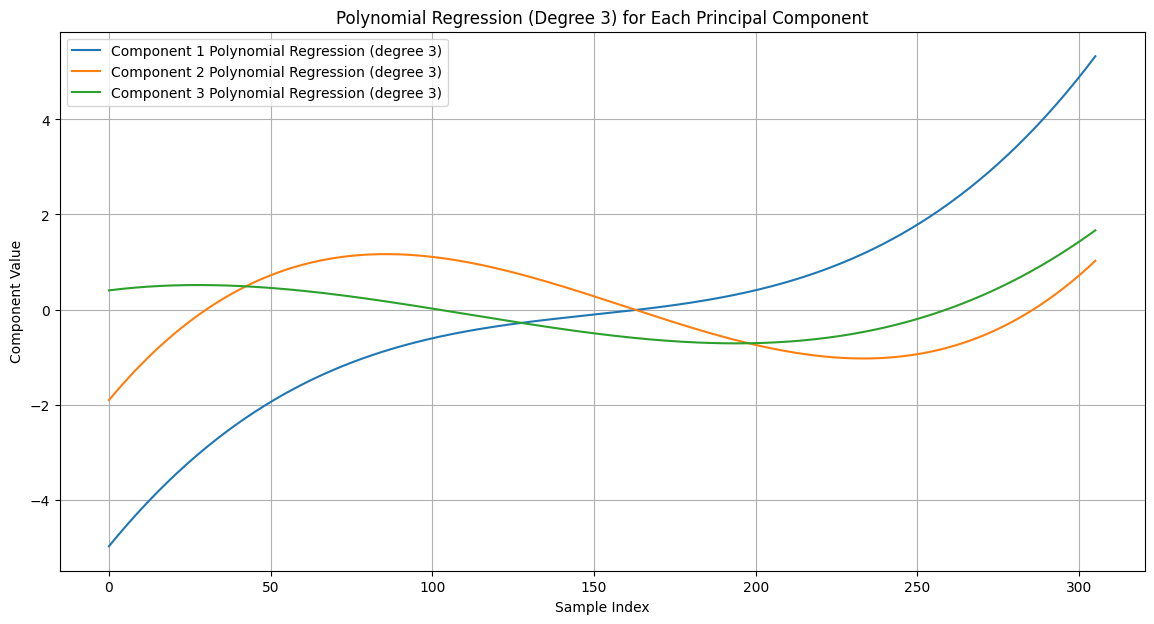

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df_states = df_linealizado.drop(columns=[col for col in df_linealizado.columns if 'Nacional' in col])

scaler = StandardScaler()
df_filtrado_scaled = scaler.fit_transform(df_states)

pca = PCA()
principalComponents = pca.fit_transform(df_filtrado_scaled)

components_df = pd.DataFrame(pca.components_, columns=df_states.columns)

explained_variance = pca.explained_variance_ratio_

most_represented_state = components_df.abs().idxmax(axis=1)

summary_df = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance (%)': explained_variance * 100,
    'Most Represented State': most_represented_state
})

print(summary_df)

plt.figure(figsize=(14, 7))

for i in range(3):
    X_component = np.arange(len(principalComponents))[:, np.newaxis]
    y_component = principalComponents[:, i]

    polynomial_features = PolynomialFeatures(degree=3)
    X_poly = polynomial_features.fit_transform(X_component)
    model = LinearRegression()
    model.fit(X_poly, y_component)
    y_poly_pred = model.predict(X_poly)

    plt.plot(X_component, y_poly_pred, label=f'Component {i+1} Polynomial Regression (degree 3)')

plt.title('Polynomial Regression (Degree 3) for Each Principal Component')
plt.xlabel('Sample Index')
plt.ylabel('Component Value')
plt.legend()
plt.grid(True)
plt.show()

   Component  Explained Variance (%) Most Represented State
0          1               76.939247                      a
1          2               11.218273                      e
2          3                7.492695                      r
3          4                2.279839                      l
4          5                1.125872                      a
5          6                0.944073                      e


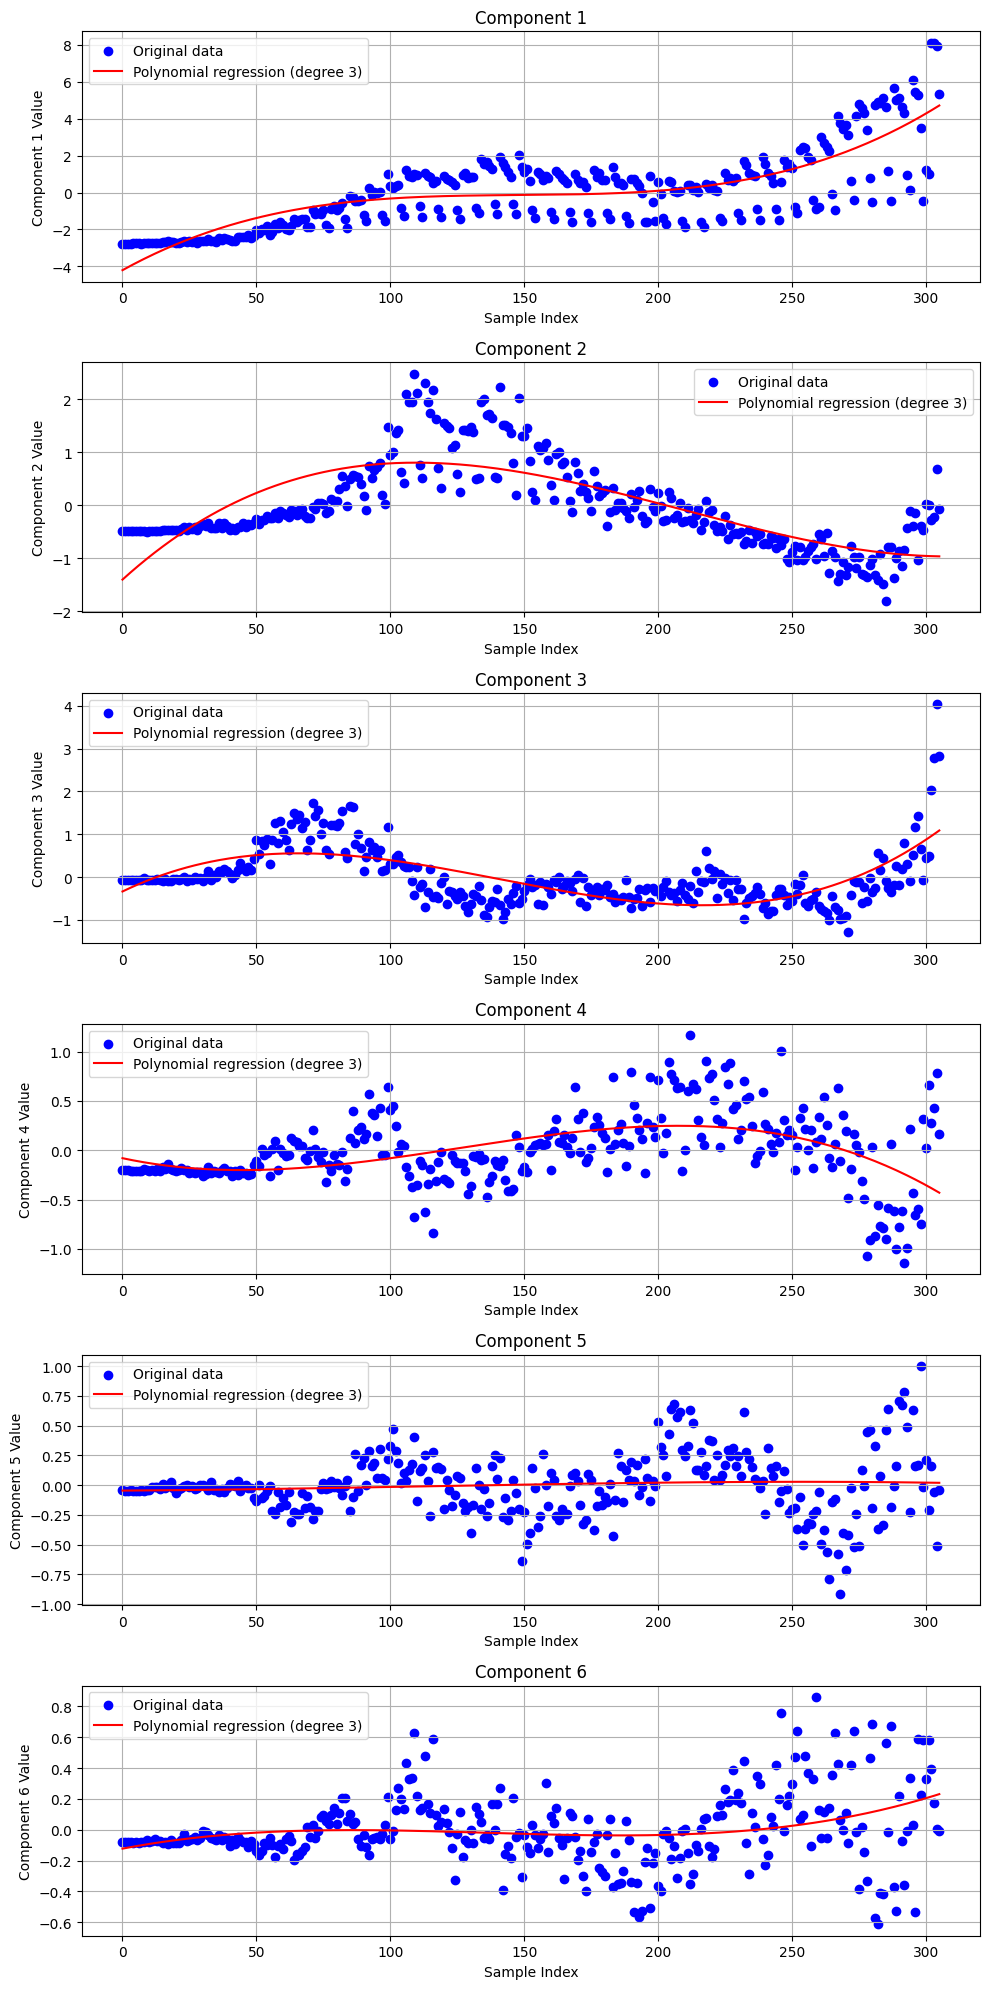

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df_states = df_states.drop(columns=[col for col in df_states.columns if 'Nacional' in col])

scaler = StandardScaler()
df_filtrado_scaled = scaler.fit_transform(df_states)

pca = PCA()
principalComponents = pca.fit_transform(df_filtrado_scaled)

components_df = pd.DataFrame(pca.components_, columns=df_states.columns)

explained_variance = pca.explained_variance_ratio_

most_represented_state = components_df.abs().idxmax(axis=1)
most_represented_state = most_represented_state.apply(lambda x: x[2])

summary_df = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance (%)': explained_variance * 100,
    'Most Represented State': most_represented_state
})

print(summary_df)

fig, axs = plt.subplots(nrows=len(principalComponents[0]), figsize=(10, 20))

for i in range(len(principalComponents[0])):
    X_component = np.arange(len(principalComponents))[:, np.newaxis]
    y_component = principalComponents[:, i]

    polynomial_features = PolynomialFeatures(degree=3)
    X_poly = polynomial_features.fit_transform(X_component)
    model = LinearRegression()
    model.fit(X_poly, y_component)
    y_poly_pred = model.predict(X_poly)

    axs[i].scatter(X_component, y_component, color='blue', label='Original data')
    axs[i].plot(X_component, y_poly_pred, color='red', label='Polynomial regression (degree 3)')
    axs[i].set_title(f'Component {i+1}')
    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel(f'Component {i+1} Value')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [182]:

data = df_linealizado
print(data)

column_names = ['Distrito Federal', 'Guanajuato', 'Jalisco', 'Morelos', 'Puebla', 'Queretaro', 'Nacional']
data.columns = column_names

data = data.reset_index(drop=True)
data.index = data.index + 1

# data['date'] = pd.to_datetime(data['date'], errors='coerce')

data.head()


            Distrito Federal  Guanajuato     Jalisco     Morelos       Puebla  \
date                                                                            
2020-03-01       -139.902919  -32.209555    2.602712  -26.770849   531.768070   
2020-03-02       -130.811272  -30.149679    3.763230  -24.946103   560.915160   
2020-03-03       -121.531789  -28.089802    4.923748  -23.149564   590.062250   
2020-03-04       -112.071851  -26.029926    6.084266  -21.381044   619.209341   
2020-03-05       -102.438759  -23.970050    7.244784  -19.640352   648.356431   
...                      ...         ...         ...         ...          ...   
2020-12-27       4770.791298  587.813187  351.918615  101.443606  9305.042262   
2020-12-28       4864.345822  589.873063  353.079133  103.331770  9334.189352   
2020-12-29       4959.490371  591.932940  354.239650  105.248752  9363.336442   
2020-12-30       5056.241723  593.992816  355.400168  107.194742  9392.483533   
2020-12-31       5154.616738

,Distrito Federal,Guanajuato,Jalisco,Morelos,Puebla,Queretaro,Nacional
1,-139.902919,-32.209555,2.602712,-26.770849,531.768070,5.045064,-8.690648
2,-130.811272,-30.149679,3.763230,-24.946103,560.915160,5.044017,-8.025316
3,-121.531789,-28.089802,4.923748,-23.149564,590.062250,5.037237,-7.369860
4,-112.071851,-26.029926,6.084266,-21.381044,619.209341,5.019981,-6.724133
5,-102.438759,-23.970050,7.244784,-19.640352,648.356431,4.988454,-6.087987


In [61]:
X = data.drop(columns=['Nacional', 'date'])
y = data['Nacional']

print(X.shape)
print(y.shape)

(306, 6)
(306,)


In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

model.fit(X_train, y_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

In [66]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 367824.3823470039


In [68]:
mean_values = X.mean()

future_dates = pd.date_range(start='2022-01-01', periods=5, freq='M')
np.random.seed(42) 

future_dates = pd.date_range(start='2024-03-31', periods=5, freq='M')
np.random.seed(42)

future_data = pd.DataFrame({
    'Distrito Federal': mean_values['Distrito Federal'] + np.random.randn(5) * 50,
    'Guanajuato': mean_values['Guanajuato'] + np.random.randn(5) * 20,
    'Jalisco': mean_values['Jalisco'] + np.random.randn(5) * 15,
    'Morelos': mean_values['Morelos'] + np.random.randn(5) * 10,
    'Puebla': mean_values['Puebla'] + np.random.randn(5) * 25,
    'Queretaro': mean_values['Queretaro'] + np.random.randn(5) * 30
}, index=future_dates)

future_predictions = model.predict(future_data)

future_data['Predicted Nacional'] = future_predictions
print(future_data)


            Distrito Federal  Guanajuato     Jalisco    Morelos      Puebla  \
2024-03-31       1208.734400  277.238829  172.630434  31.752942  202.418997   
2024-04-30       1176.985478  313.505825  172.595753  27.247506  160.133370   
2024-05-31       1216.283120  297.270263  183.211133  40.518290  167.465983   
2024-06-30       1260.050186  272.532081  150.882496  28.295576  130.159073   
2024-07-31       1172.191024  292.772769  153.707932  23.252780  152.168210   

             Queretaro  Predicted Nacional  
2024-03-31  115.533560         4879.333333  
2024-04-30   77.676075         4879.333333  
2024-05-31  123.476823         4879.333333  
2024-06-30   94.186722         4136.000000  
2024-07-31  103.455070         4136.000000  


In [69]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mean_values = X.mean()

future_dates = pd.date_range(start='2022-01-01', periods=5, freq='M')
future_data = pd.DataFrame({
    'Distrito Federal': mean_values['Distrito Federal'] + np.random.randn(5) * 50,
    'Guanajuato': mean_values['Guanajuato'] + np.random.randn(5) * 20,
    'Jalisco': mean_values['Jalisco'] + np.random.randn(5) * 15,
    'Morelos': mean_values['Morelos'] + np.random.randn(5) * 10,
    'Puebla': mean_values['Puebla'] + np.random.randn(5) * 25,
    'Queretaro': mean_values['Queretaro'] + np.random.randn(5) * 30
}, index=future_dates)

future_predictions = model.predict(future_data)

future_data['Predicted Nacional'] = future_predictions
print(future_data)


Mean Squared Error: 181624.6360629032
            Distrito Federal  Guanajuato     Jalisco    Morelos      Puebla  \
2022-01-31       1153.813362  257.504696  190.658698  30.177375  173.879877   
2022-02-28       1276.512602  286.098841  182.152224  32.769429  156.150721   
2022-03-31       1183.223832  242.728166  177.846975  47.947039  148.854728   
2022-04-30       1131.013146  255.357848  175.065144  40.812000  181.069685   
2022-05-31       1225.025938  285.858793  157.403869  19.745415  191.552766   

             Queretaro  Predicted Nacional  
2022-01-31  140.144286             4781.76  
2022-02-28   87.029357             4533.96  
2022-03-31  102.929511             4342.63  
2022-04-30  122.143785             4747.95  
2022-05-31  141.472236             4708.46  


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Best Decision Tree Regressor - MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print(f'Cross-Validation RMSE: {cv_rmse_scores.mean()}')

print("R2 Score:", best_model.score(X_test, y_test))



Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree Regressor - MSE: 355733.1442652331, MAE: 428.4946236559139, RMSE: 596.4336880703781
Cross-Validation RMSE: 1423.3304413367284
R2 Score: 0.975671199709617


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Best Random Forest Regressor - MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print(f'Cross-Validation RMSE: {cv_rmse_scores.mean()}')
print("R2: ", best_model.score(X_test, y_test))


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Regressor - MSE: 176222.0005231818, MAE: 276.1463704501979, RMSE: 419.78804237755725
Cross-Validation RMSE: 1252.9153767703724
R2:  0.9879480730805795


Best Decision Tree Regressor - MSE: 355733.1442652331, MAE: 428.4946236559139, RMSE: 596.4336880703781
Decision Tree R2 Score: 0.975671199709617
Best Random Forest Regressor - MSE: 165439.84196774187, MAE: 271.2517741935483, RMSE: 406.74296793889613
Random Forest R2 Score: 0.9886854712860134


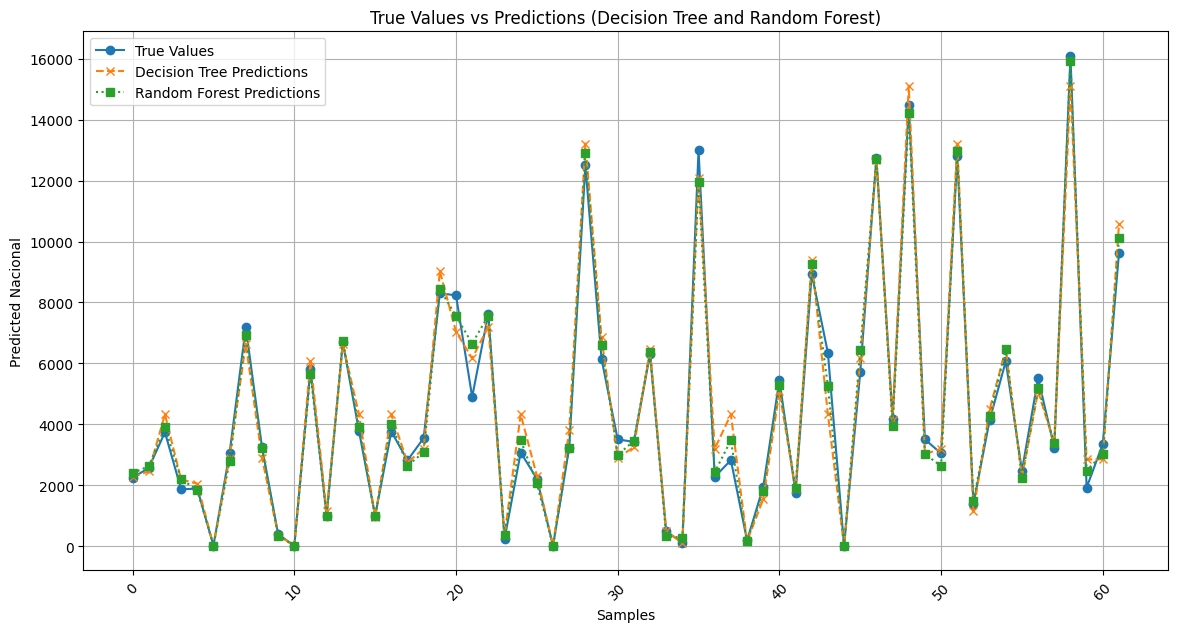

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
param_grid_tree = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print(f'Best Decision Tree Regressor - MSE: {mse_tree}, MAE: {mae_tree}, RMSE: {rmse_tree}')
print("Decision Tree R2 Score:", best_tree_model.score(X_test, y_test))

forest_model = RandomForestRegressor(random_state=42)
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
grid_search_forest = GridSearchCV(estimator=forest_model, param_grid=param_grid_forest, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_forest.fit(X_train, y_train)
best_forest_model = grid_search_forest.best_estimator_
y_pred_forest = best_forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
print(f'Best Random Forest Regressor - MSE: {mse_forest}, MAE: {mae_forest}, RMSE: {rmse_forest}')
print("Random Forest R2 Score:", best_forest_model.score(X_test, y_test))

plt.figure(figsize=(14, 7))

dates = X_test['date'] if 'date' in X_test.columns else np.arange(len(y_test))

plt.plot(dates, y_test.values, label='True Values', linestyle='-', marker='o')
plt.plot(dates, y_pred_tree, label='Decision Tree Predictions', linestyle='--', marker='x')
plt.plot(dates, y_pred_forest, label='Random Forest Predictions', linestyle=':', marker='s')
plt.title('True Values vs Predictions (Decision Tree and Random Forest)')
plt.xlabel('Date' if 'date' in X_test.columns else 'Samples')
plt.ylabel('Predicted Nacional')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data.drop(columns=['Nacional'])
y = data['Nacional']
X['date'] = data['date']

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['date']), y, test_size=0.3, random_state=42)

dates_train = X.loc[X_train.index, 'date']
dates_test = X.loc[X_test.index, 'date']

def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = model.score(X_test, y_test)
    print(f'{model_name} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}')
    return y_pred

tree_model = DecisionTreeRegressor(random_state=42)
param_grid_tree = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = train_and_evaluate(best_tree_model, X_train, X_test, y_train, y_test, "Decision Tree Regressor without PCA")

forest_model = RandomForestRegressor(random_state=42)
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
grid_search_forest = GridSearchCV(estimator=forest_model, param_grid=param_grid_forest, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_forest.fit(X_train, y_train)
best_forest_model = grid_search_forest.best_estimator_
y_pred_forest = train_and_evaluate(best_forest_model, X_train, X_test, y_train, y_test, "Random Forest Regressor without PCA")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

grid_search_tree_pca = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree_pca.fit(X_train_pca, y_train)
best_tree_model_pca = grid_search_tree_pca.best_estimator_
y_pred_tree_pca = train_and_evaluate(best_tree_model_pca, X_train_pca, X_test_pca, y_train, y_test, "Decision Tree Regressor with PCA")

grid_search_forest_pca = GridSearchCV(estimator=forest_model, param_grid=param_grid_forest, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_forest_pca.fit(X_train_pca, y_train)
best_forest_model_pca = grid_search_forest_pca.best_estimator_
y_pred_forest_pca = train_and_evaluate(best_forest_model_pca, X_train_pca, X_test_pca, y_train, y_test, "Random Forest Regressor with PCA")

plt.figure(figsize=(14, 7))

plt.plot(dates_test, y_test.values, label='True Values', linestyle='-', marker='o')
plt.plot(dates_test, y_pred_tree, label='Decision Tree Predictions without PCA', linestyle='--', marker='x')
plt.plot(dates_test, y_pred_forest, label='Random Forest Predictions without PCA', linestyle=':', marker='s')
plt.plot(dates_test, y_pred_tree_pca, label='Decision Tree Predictions with PCA', linestyle='-.', marker='d')
plt.plot(dates_test, y_pred_forest_pca, label='Random Forest Predictions with PCA', linestyle='-', marker='*')

plt.title('True Values vs Predictions (Decision Tree and Random Forest, with and without PCA)')
plt.xlabel('Date')
plt.ylabel('Predicted Nacional')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

KeyError: 'date'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
param_grid_tree = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print(f'Best Decision Tree Regressor - MSE: {mse_tree}, MAE: {mae_tree}, RMSE: {rmse_tree}')
print("Decision Tree R2 Score:", best_tree_model.score(X_test, y_test))

forest_model = RandomForestRegressor(random_state=42)
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
grid_search_forest = GridSearchCV(estimator=forest_model, param_grid=param_grid_forest, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_forest.fit(X_train, y_train)
best_forest_model = grid_search_forest.best_estimator_
y_pred_forest = best_forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
print(f'Best Random Forest Regressor - MSE: {mse_forest}, MAE: {mae_forest}, RMSE: {rmse_forest}')
print("Random Forest R2 Score:", best_forest_model.score(X_test, y_test))

plt.figure(figsize=(14, 7))

dates = X_test['date'] if 'date' in X_test.columns else np.arange(len(y_test))
plt.plot(dates, y_pred_tree, label='Decision Tree Predictions', linestyle='--', marker='o', color='green')
plt.plot(dates, y_pred_forest, label='Random Forest Predictions', linestyle='', marker='s', color="purple")
plt.plot(dates, y_test.values, label='True Values', linestyle='', marker='x', color='red')
plt.title('True Values vs Predictions (Decision Tree and Random Forest)')
plt.xlabel('Date' if 'date' in X_test.columns else 'Samples')
plt.ylabel('Predicted Nacional')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()